In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [9]:
df.shape

(200000, 7)

In [10]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [13]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [15]:
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean())
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median())


In [16]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [17]:
df = df.assign(
    hour=df['pickup_datetime'].dt.hour,
    day=df['pickup_datetime'].dt.day,
    month=df['pickup_datetime'].dt.month,
    year=df['pickup_datetime'].dt.year,
    dayofweek=df['pickup_datetime'].dt.dayofweek
)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
year,"Axes(0.547727,0.335366;0.352273x0.0939024)"


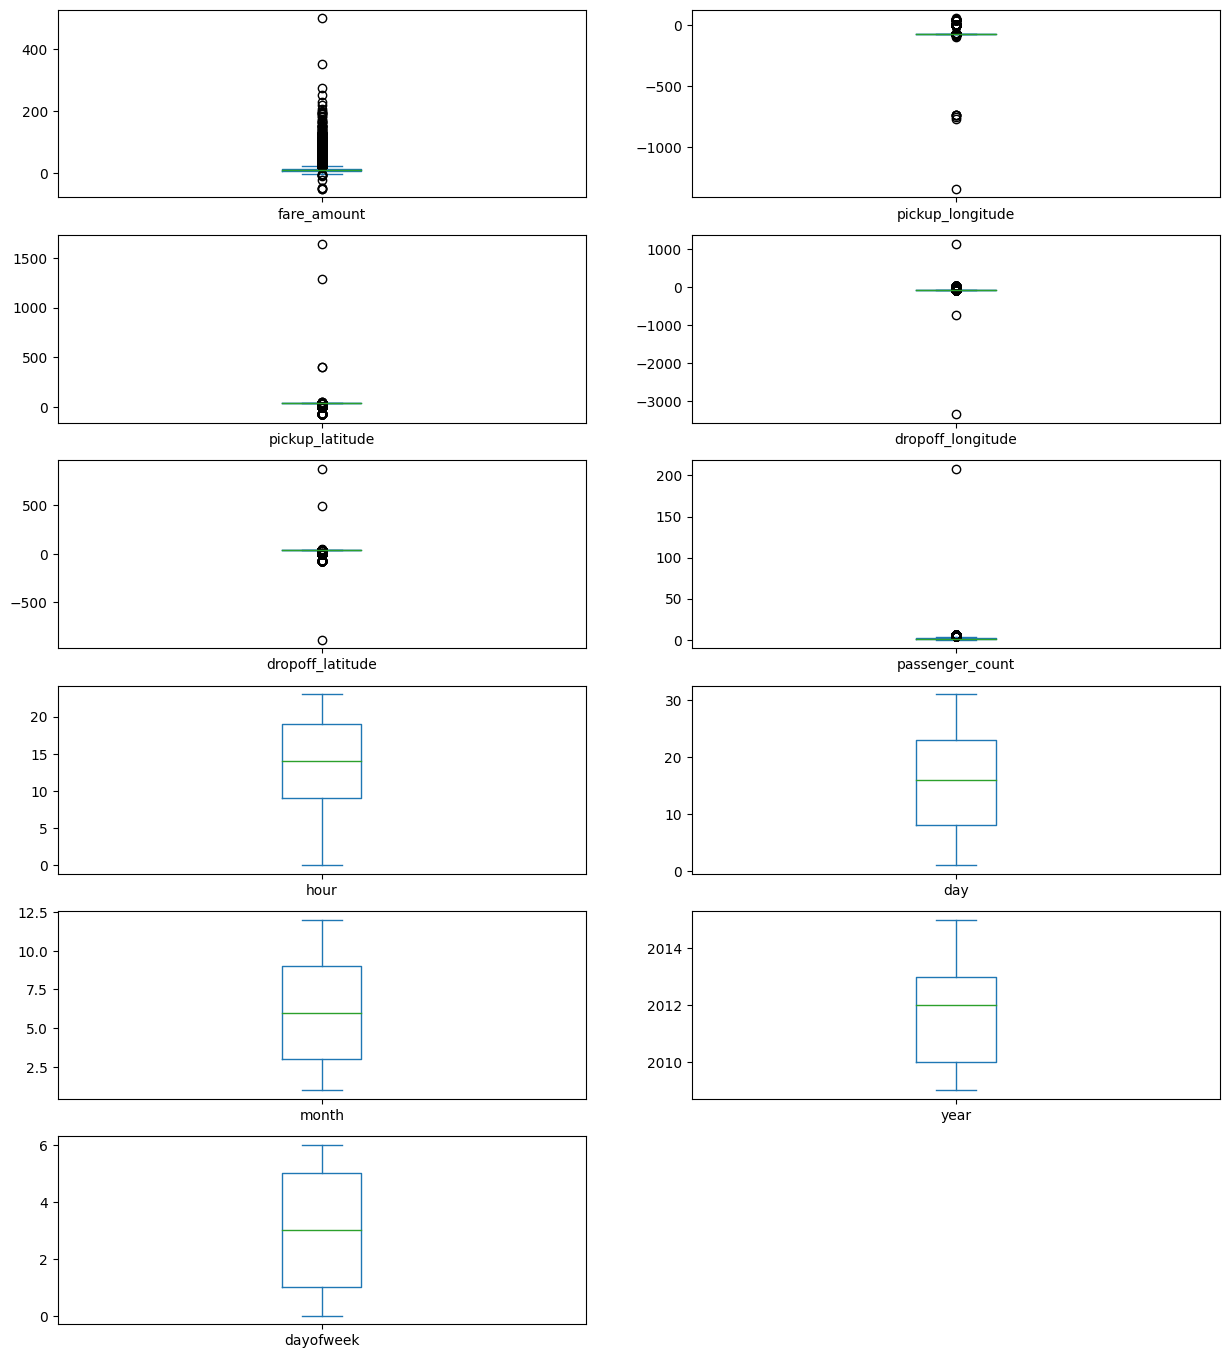

In [18]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [19]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

df = treat_outliers_all(df, df.columns)


,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
year,"Axes(0.547727,0.335366;0.352273x0.0939024)"


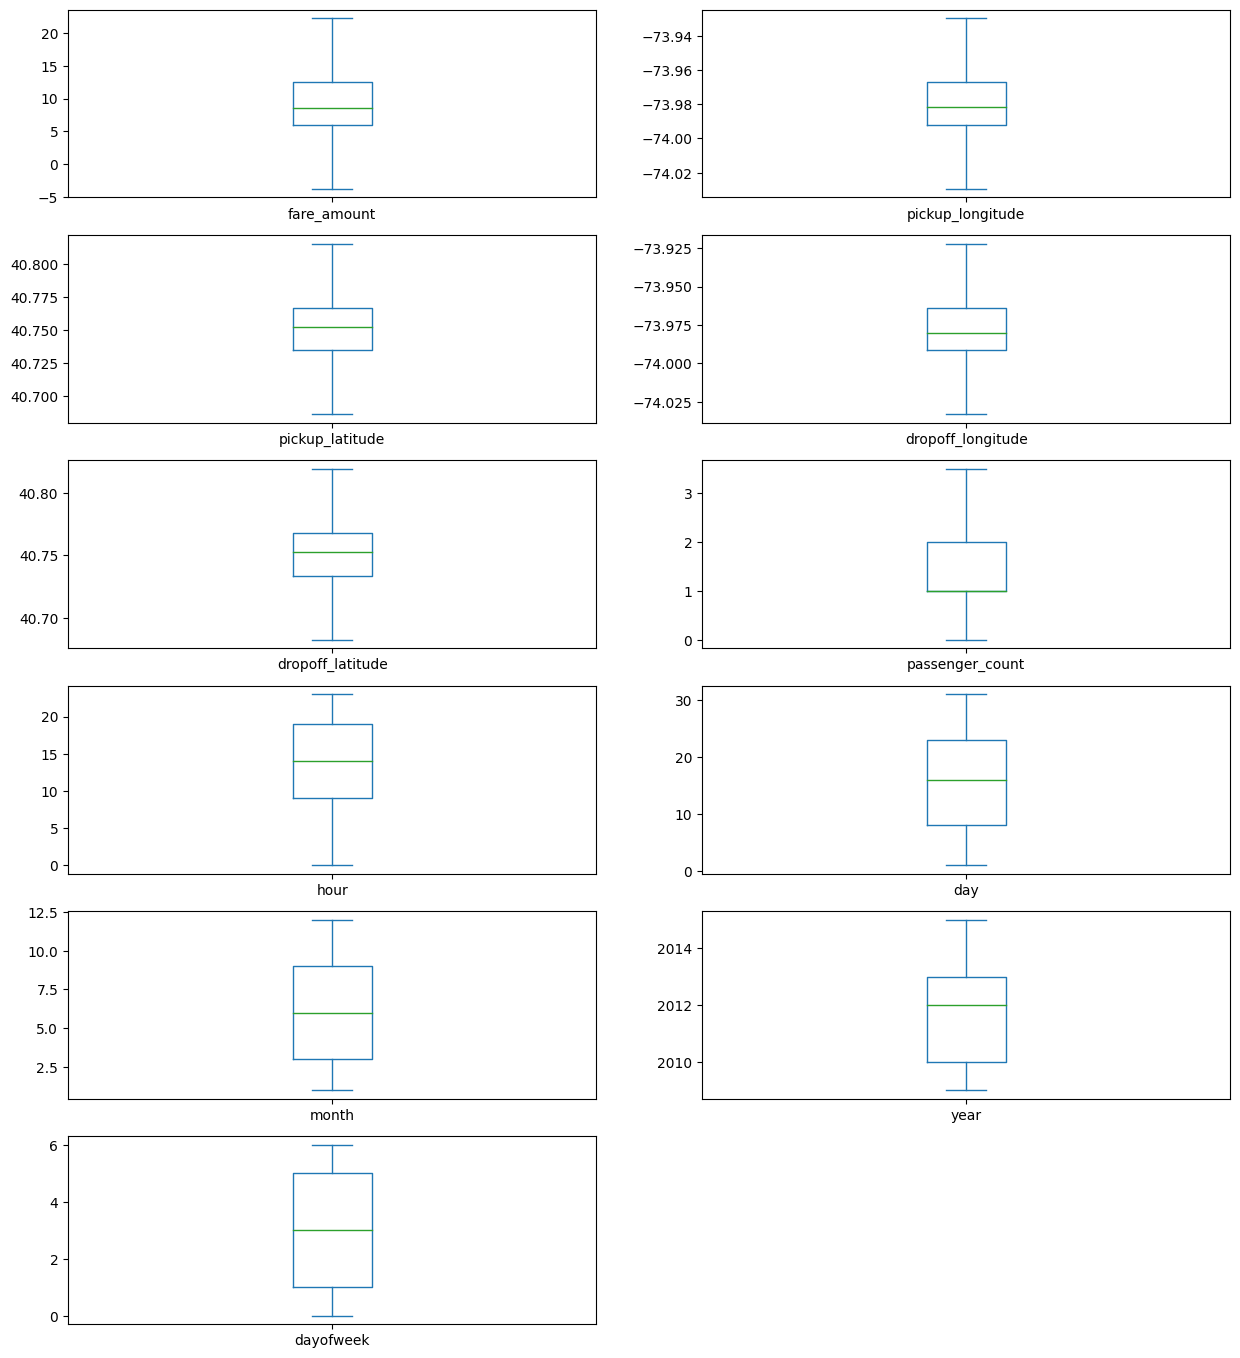

In [20]:
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))


In [22]:
!pip install haversine

In [23]:
import haversine as hs

travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = [
        df['pickup_longitude'][pos],
        df['pickup_latitude'][pos],
        df['dropoff_longitude'][pos],
        df['dropoff_latitude'][pos]
    ]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

df['dist_travel_km'] = travel_dist


In [24]:
df = df.loc[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)]


In [25]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
    (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180)
]
df.drop(incorrect_coordinates.index, inplace=True, errors='ignore')


<ipython-input-25-363334c7e15e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(incorrect_coordinates.index, inplace=True, errors='ignore')


<Axes: >

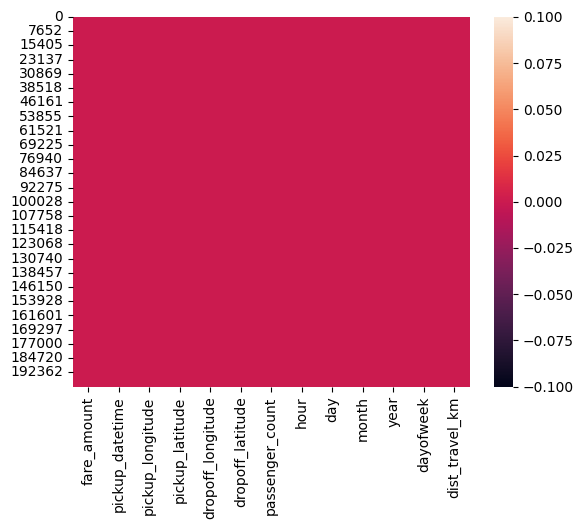

In [26]:
df.isnull().sum()
sns.heatmap(df.isnull())


<Axes: >

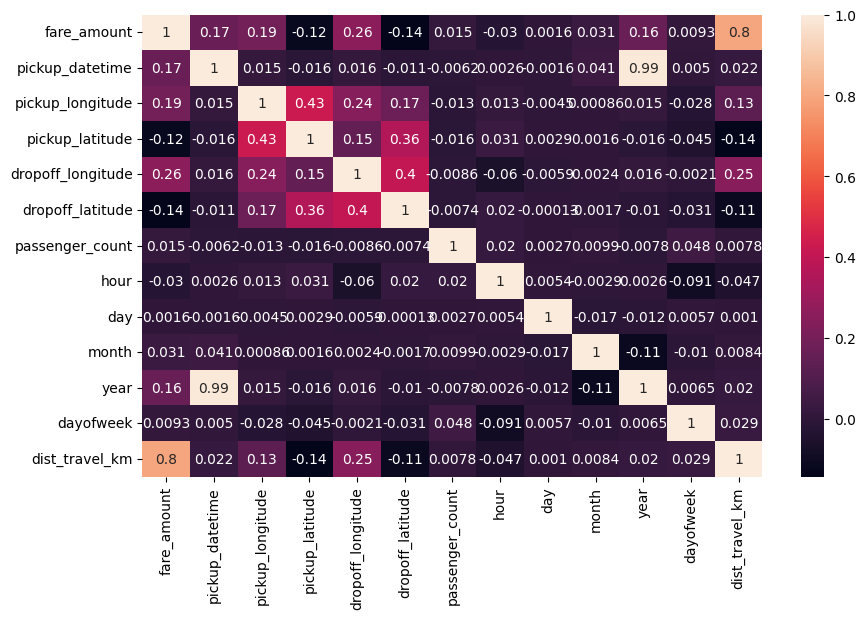

In [27]:
corr = df.corr()
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True)


In [29]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [32]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.coef_ #To find the linear coeeficient
regression.intercept_ #To find the linear intercept


3890.0478793918937

In [33]:
prediction = regression.predict(X_test) #To predict the target values
print(prediction)

[13.34315775 10.57143554  6.87677683 ...  8.02082962 10.59244855
 14.09998998]


In [34]:
y_test

,fare_amount
199774,14.90
28512,9.00
88772,6.90
156239,8.50
106707,7.30
...,...
110434,8.50
145607,16.50
74436,9.00
4630,18.50


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

9.165179599102418
3.0274047630111203


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction
rf.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
y_pred = rf.predict(X_test)
y_pred

array([13.4845, 10.27  ,  5.297 , ...,  7.777 , 13.785 , 22.0845])

In [43]:
R2_Random = r2_score(y_test,y_pred)
R2_Random
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random
RMSE_Random = np.sqrt(MSE_Random)
RMSE_Random

2.194565229502706

In [44]:
average_fare = np.mean(y_pred)

In [45]:
print(f"Based on the prediction model, the average fare price is estimated to be: {average_fare:.2f}")


Based on the prediction model, the average fare price is estimated to be: 10.99


In [ ]:
# prompt: conclusion fare price for above prediction.

# Assuming 'y_pred' contains the predicted fare prices from your RandomForestRegressor model.

# Calculate the average predicted fare price
average_fare = np.mean(y_pred)

# Print the conclusion
print(f"Based on the prediction model, the average fare price is estimated to be: {average_fare:.2f}")

# Optionally, you could add more context:
# - Mention the range of predicted fare prices
# - Discuss any factors that might influence the fare price (e.g., distance, time of day)
# - Explain the limitations of the model and potential sources of error